In [1]:
#Rebecca Lewis
#DSC 640
#Histogram, BoxPlot, Bullet Graph

import pandas as pd, numpy as np
from matplotlib import pyplot as plt


In [3]:
#histogram
edu = pd.read_csv('C:\\Users\\rvick\\OneDrive\\Bellevue\\DSC 640\\Week 11_12\\ex6-2\\education.csv')

In [4]:
edu.head()

,state,reading,math,writing,percent_graduates_sat,pupil_staff_ratio,dropout_rate
0,United States,501,515,493,46,7.9,4.4
1,Alabama,557,552,549,7,6.7,2.3
2,Alaska,520,516,492,46,7.9,7.3
3,Arizona,516,521,497,26,10.4,7.6
4,Arkansas,572,572,556,5,6.8,4.6


In [6]:
edu = edu[edu['state'] != 'United States']

In [7]:
edu.head()

,state,reading,math,writing,percent_graduates_sat,pupil_staff_ratio,dropout_rate
1,Alabama,557,552,549,7,6.7,2.3
2,Alaska,520,516,492,46,7.9,7.3
3,Arizona,516,521,497,26,10.4,7.6
4,Arkansas,572,572,556,5,6.8,4.6
5,California,500,513,498,49,10.9,5.5


<function matplotlib.pyplot.show(*args, **kw)>

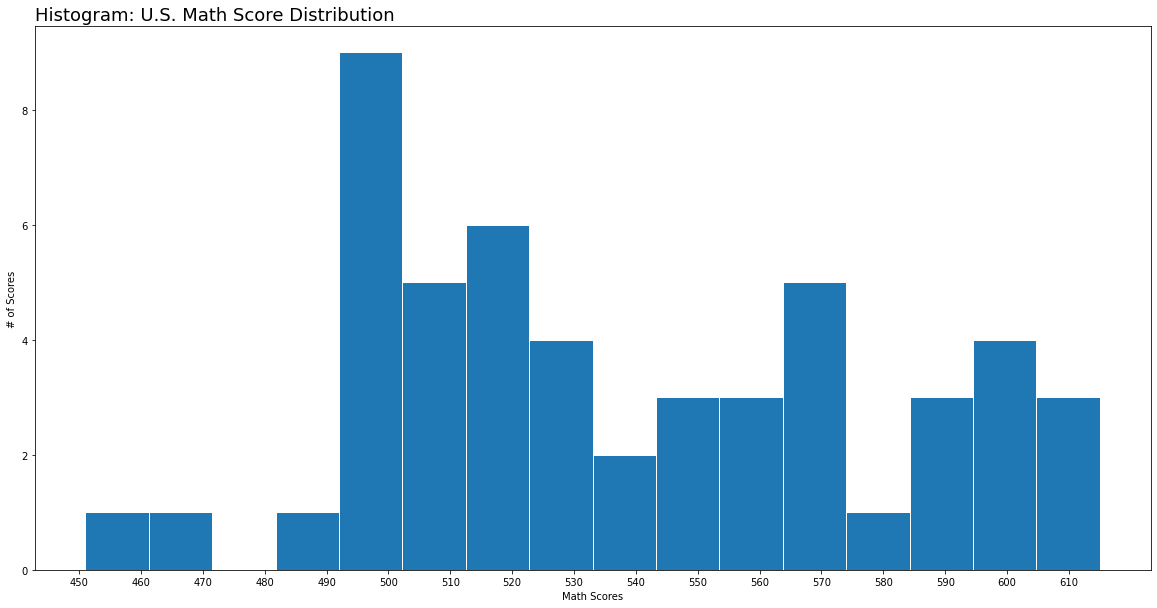

In [16]:
plt.figure(figsize=(20, 10))

plt.hist(edu['math'], bins=16, edgecolor='white', )
plt.xlabel("Math Scores")
plt.ylabel("# of Scores")
plt.xticks(np.arange(450, 620, 10))
plt.title("Histogram: U.S. Math Score Distribution", size=18, loc='left')
plt.show

In [36]:
#boxplot
crime = pd.read_csv('C:\\Users\\rvick\\OneDrive\\Bellevue\\DSC 640\\Week 11_12\\ex6-2\\crimeratesbystate-formatted.csv')

crime.head()

,state,murder,forcible_rape,robbery,aggravated_assault,burglary,larceny_theft,motor_vehicle_theft
0,United States,5.6,31.7,140.7,291.1,726.7,2286.3,416.7
1,Alabama,8.2,34.3,141.4,247.8,953.8,2650.0,288.3
2,Alaska,4.8,81.1,80.9,465.1,622.5,2599.1,391.0
3,Arizona,7.5,33.8,144.4,327.4,948.4,2965.2,924.4
4,Arkansas,6.7,42.9,91.1,386.8,1084.6,2711.2,262.1


In [37]:
crime = crime[crime['state'].str.strip() != 'United States']
crime.head()

,state,murder,forcible_rape,robbery,aggravated_assault,burglary,larceny_theft,motor_vehicle_theft
1,Alabama,8.2,34.3,141.4,247.8,953.8,2650.0,288.3
2,Alaska,4.8,81.1,80.9,465.1,622.5,2599.1,391.0
3,Arizona,7.5,33.8,144.4,327.4,948.4,2965.2,924.4
4,Arkansas,6.7,42.9,91.1,386.8,1084.6,2711.2,262.1
5,California,6.9,26.0,176.1,317.3,693.3,1916.5,712.8


In [40]:
crime_long = pd.melt(crime, id_vars='state', value_vars=['murder', 'forcible_rape', 'robbery','aggravated_assault', 'burglary', 'larceny_theft', 'motor_vehicle_theft'])
crime_long.head()

,state,variable,value
0,Alabama,murder,8.2
1,Alaska,murder,4.8
2,Arizona,murder,7.5
3,Arkansas,murder,6.7
4,California,murder,6.9


In [47]:
crime_long.reset_index(inplace=True)
crime_long.columns
crime_long.head()

ValueError: cannot insert level_0, already exists

In [48]:
crime_long = crime_long.drop(['level_0','index'], axis=1)

In [49]:
crime_long.head()

,state,variable,value
0,Alabama,murder,8.2
1,Alaska,murder,4.8
2,Arizona,murder,7.5
3,Arkansas,murder,6.7
4,California,murder,6.9


In [54]:
crimePVT = crime_long.pivot(index='variable', columns='state', values='value' )
crimePVT.head()

state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
variable,,,,,,,,,,,,,,,,,,,,,
aggravated_assault,247.8,465.1,327.4,386.8,317.3,264.7,138.6,428.2,721.3,496.6,...,108.1,541.9,329.8,143.4,83.5,154.8,205.8,206.1,135.2,188.1
burglary,953.8,622.5,948.4,1084.6,693.3,744.8,437.1,688.9,649.7,926.3,...,324.4,1026.9,961.6,606.2,491.8,392.1,959.7,621.2,440.8,476.3
forcible_rape,34.3,81.1,33.8,42.9,26.0,43.4,20.0,44.7,30.2,37.1,...,46.7,36.4,37.2,37.3,23.3,22.7,44.7,17.7,20.6,24.0
larceny_theft,2650.0,2599.1,2965.2,2711.2,1916.5,2735.2,1824.1,2144.0,2694.9,2658.3,...,1343.7,2828.1,2961.7,2918.8,1686.1,2035.0,3149.5,1794.0,1992.8,2533.9
motor_vehicle_theft,288.3,391.0,924.4,262.1,712.8,559.5,296.8,278.5,1402.3,423.3,...,108.4,420.6,408.7,343.9,102.9,211.1,783.9,210.0,226.6,145.1


In [66]:
np.asarray(crimePVT.index.values)

array(['aggravated_assault', 'burglary', 'forcible_rape', 'larceny_theft',
       'motor_vehicle_theft', 'murder', 'robbery'], dtype=object)

<function matplotlib.pyplot.show(*args, **kw)>

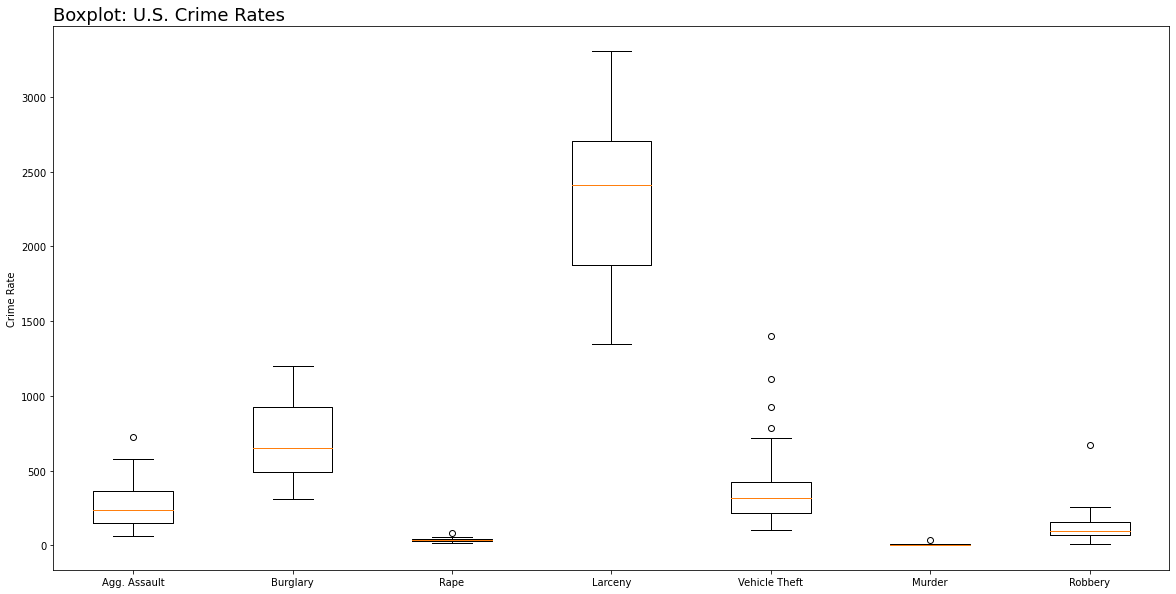

In [70]:
plt.figure(figsize=(20, 10))

plt.boxplot(crimePVT)
plt.xticks([1,2,3,4,5,6,7], ['Agg. Assault', 'Burglary', 'Rape', 'Larceny', 'Vehicle Theft', 'Murder', 'Robbery'])
plt.ylabel("Crime Rate")
plt.title("Boxplot: U.S. Crime Rates", size=18, loc='left')
plt.show

In [79]:
gs_edu = edu[edu['state'].isin(['Alabama', 'Florida','Georgia','Louisiana','Mississippi', 'Texas'])].reset_index()
gs_edu



,index,state,reading,math,writing,percent_graduates_sat,pupil_staff_ratio,dropout_rate
0,1,Alabama,557,552,549,7,6.7,2.3
1,10,Florida,497,498,480,59,8.1,3.8
2,11,Georgia,490,491,479,71,7.0,4.6
3,19,Louisiana,563,558,555,7,6.8,7.4
4,25,Mississippi,567,554,559,4,6.9,4.3
5,44,Texas,486,506,475,51,7.4,4.0


<function matplotlib.pyplot.show(*args, **kw)>

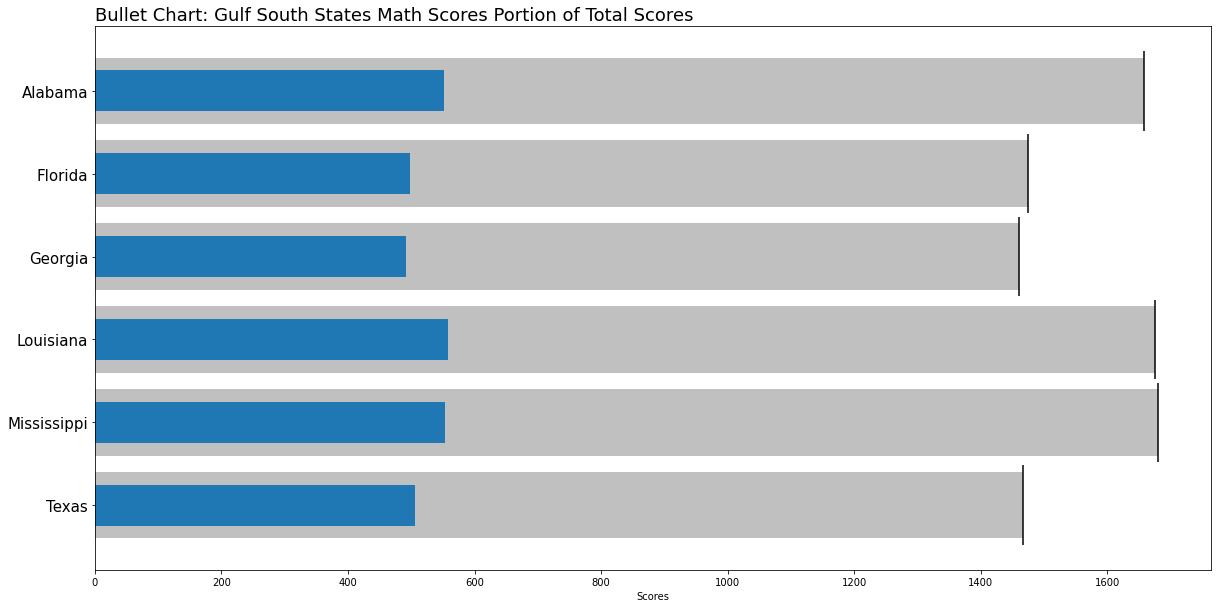

In [109]:
plt.figure(figsize=(20, 10))

plt.barh(np.arange(len(gs_edu['state'])),gs_edu['math'] + gs_edu['reading'] + gs_edu['writing'],color='#C0C0C0', yerr=len(gs_edu['state'])*.08)
plt.barh(np.arange(len(gs_edu['state'])),gs_edu['math'], height = .5)
plt.yticks(np.arange(len(gs_edu['state'])), gs_edu['state'], size=15)
plt.gca().invert_yaxis()
plt.xlabel("Scores")
plt.title("Bullet Chart: Gulf South States Math Scores Portion of Total Scores", size=18, loc='left')
    
plt.show

array([0.42624184, 0.5256046 , 0.1146055 , 0.33345731, 0.13697761,
       0.2389121 ])